# Importing

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from matplotlib.pyplot import plot
from pathlib import Path
from scipy.stats.mstats import gmean
from scipy.stats import wilcoxon, ttest_rel


# Utility functions

In [4]:
N_SP1_TTS_path = Path('/home/km/Desktop/JCIM/Results/N_SP1_TTS')

In [5]:
def concat_tables(path, table_name='test'):
    table_full_name = 'test' + '_initial_stats.csv'
    tables_to_conc = []
    for it in range(0, 10):
        it_tb = pd.read_csv(path / str(it) / table_full_name)
        tables_to_conc.append(it_tb)
    concat = pd.concat(tables_to_conc)
    return concat

In [6]:
def from_conc_array(concat_t, metric, dim_2=10):
    values_np = np.array(concat_t[metric])
    dim_1 = int(values_np.shape[0] / dim_2)
    np_for_plot = np.reshape(values_np, (dim_1, dim_2))
    return np_for_plot

In [7]:
N_SP1_TTS_test_all = concat_tables(N_SP1_TTS_path)

In [8]:
N_SP1_TTS_test_test_MCC = from_conc_array(N_SP1_TTS_test_all, 'MCC')

In [9]:
np.argmax(np.mean(N_SP1_TTS_test_test_MCC, axis=1))

284

In [10]:
np.mean(N_SP1_TTS_test_test_MCC, axis=1)[284]

0.6555738807509972

In [15]:
np.mean(N_SP1_TTS_test_test_MCC, axis=1)[-1]

0.4598531287625941

In [11]:
N_SP1_TTS_test_test_MCC.shape

(903, 10)

In [12]:
N_SP1_TTS_test_test_MCC[902:903,]

array([[0.42261662, 0.46207083, 0.38452347, 0.44894107, 0.50163395,
        0.51330891, 0.4114302 , 0.53838887, 0.4923523 , 0.42326506]])

In [16]:
N_SP1_TTS_test_test_MCC[283:284,][0]

array([0.60341556, 0.66161167, 0.45743323, 0.6798693 , 0.60341556,
       0.63688328, 0.56816661, 0.65389409, 0.69867046, 0.57777625])

In [17]:
ttest_rel(N_SP1_TTS_test_test_MCC[902:903,][0], N_SP1_TTS_test_test_MCC[283:284,][0])

Ttest_relResult(statistic=-9.615373172229592, pvalue=4.954821250679318e-06)

In [18]:
wilcoxon(N_SP1_TTS_test_test_MCC[902:903,][0], N_SP1_TTS_test_test_MCC[283:284,][0])

WilcoxonResult(statistic=0.0, pvalue=0.001953125)

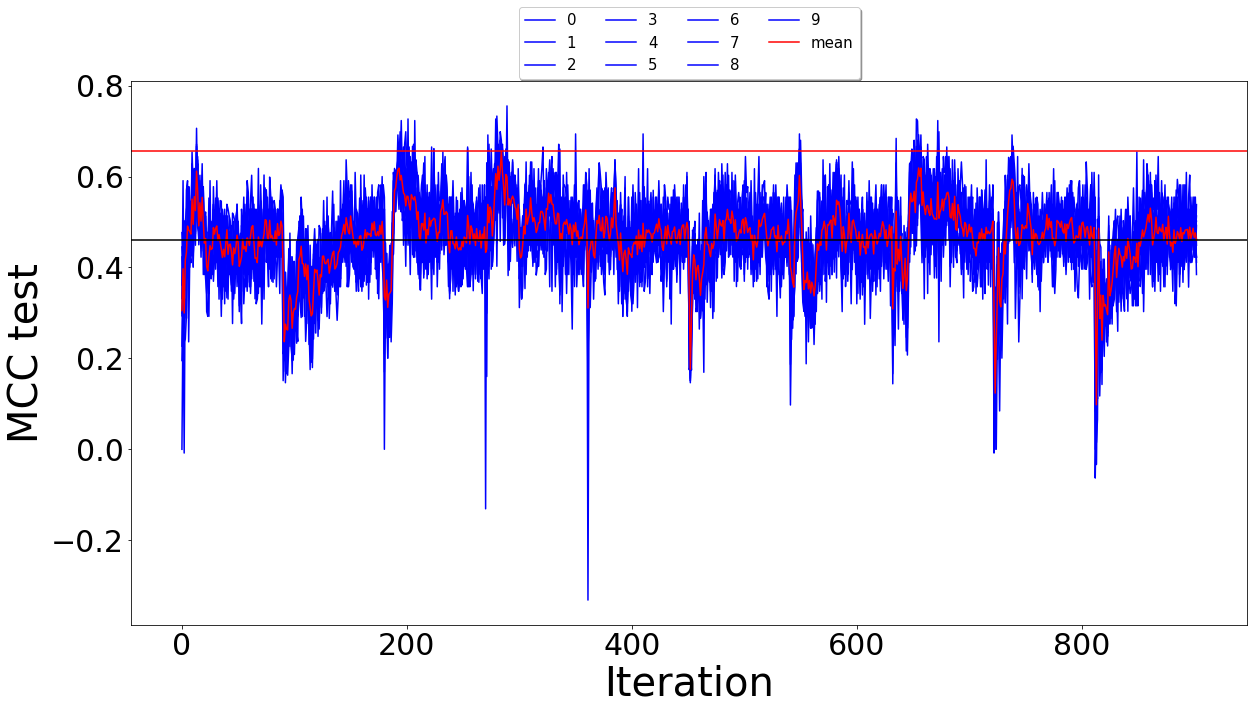

In [19]:
fig, ax = plt.subplots(figsize=(20, 10))

ax.plot(N_SP1_TTS_test_test_MCC, label=list(range(0, 10)), color='blue')
ax.plot(np.mean(N_SP1_TTS_test_test_MCC, axis=1), label='mean', color='red')
# ax.legend(fontsize=30)
ax.axhline(np.mean(N_SP1_TTS_test_test_MCC, axis=1).max(), color='red')
ax.axhline(np.mean(N_SP1_TTS_test_test_MCC, axis=1)[-1], color='black')

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
          ncol=4, fancybox=True, shadow=True, fontsize=15)

ax.tick_params(axis='both', which='major', labelsize=30)
ax.set_ylabel('MCC test')
ax.yaxis.label.set_size(40)
ax.set_xlabel('Iteration')
ax.xaxis.label.set_size(40)
